In [140]:
import numpy as np
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
from sklearn.mixture import GaussianMixture

In [141]:
data = pd.read_csv('estaturas_normales.csv')

In [142]:
data.describe()

,Estatura(metros),Edad(anios)
count,42.000000,42.00000
mean,1.731190,29.00000
std,0.076516,6.24695
min,1.550000,21.00000
25%,1.665000,25.00000
50%,1.730000,27.00000
75%,1.777500,32.00000
max,1.900000,53.00000


In [143]:
data["Estatura(metros)"]*=100

In [144]:
iteraciones = 100
k_cluster = 2
m_col = data.shape[0]
n_col = data.shape[1]
centroid_min = data.min().min()
centroid_max = data.max().max()
centroids = []

In [145]:
print(centroid_max)

190.0


In [146]:
for i in range(k_cluster):
    centroid = np.random.uniform(centroid_min, centroid_max, n_col)
    centroids.append(centroid)


centroids = pd.DataFrame(centroids, columns = data.columns)

In [147]:
centroids

,Estatura(metros),Edad(anios)
0,157.462283,108.033016
1,79.281155,164.517586


In [148]:
#Funcion calculo de error en los valores
def error_calc(a,b):
    error = np.square(np.sum((a+b)**2))
    
    return error


In [149]:
errors = np.array([])

for centroid in range(centroids.shape[0]):
    error = error_calc(centroids.iloc[centroid, :2], data.iloc[0,:2])
    errors = np.append(errors, error)

errors

array([1.68557947e+10, 1.03993046e+10])

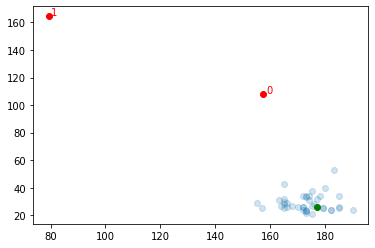

In [150]:
#Visualizacion de como estan los centroides en nuestra data:
plt.scatter(data.iloc[1:,0], data.iloc[1:,1],  marker = 'o', alpha = 0.2)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', c = 'r')
plt.scatter(data.iloc[0,0], data.iloc[0,1],  marker = 'o', c = 'g')
for i in range(centroids.shape[0]):
    plt.text(centroids.iloc[i,0]+1, centroids.iloc[i,1]+1, s = centroids.index[i], c = 'r')

In [151]:
np.where(errors == np.amin(errors))[0].tolist()[0]

1

In [152]:
#Asignación del centroide mejor posicionado.
def assign_centroid(data, centroids):
    n_observations = data.shape[0]
    centroid_assign = []
    centroid_errors = []
    k = centroids.shape[0]

    
    for observation in range(n_observations):

        # Calculate the errror
        errors = np.array([])
        for centroid in range(k):
            error = error_calc(centroids.iloc[centroid, :2], data.iloc[observation,:2])
            errors = np.append(errors, error)

        # Calculate closest centroid & error 
        closest_centroid =  np.where(errors == np.amin(errors))[0].tolist()[0]
        centroid_error = np.amin(errors)

        # Assign values to lists
        centroid_assign.append(closest_centroid)
        centroid_errors.append(centroid_error)

    return (centroid_assign,centroid_errors)

data['centroid'], data['error'] = assign_centroid(data.iloc[:,:2] ,centroids)
data[['centroid', 'error']].head()

,centroid,error
0,1,1.039930e+10
1,1,1.048135e+10
2,1,9.737959e+09
3,1,1.115196e+10
4,1,9.661405e+09


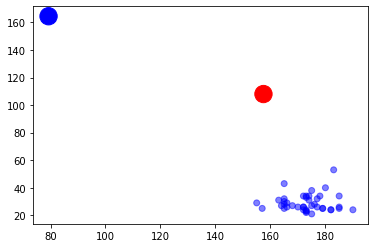

In [153]:
colors = {0:'red', 1:'blue', 2:'green'}

plt.scatter(data.iloc[:,0], data.iloc[:,1],  marker = 'o', c = data['centroid'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', s=300, 
           c = centroids.index.map(lambda x: colors[x]))

In [154]:
#Error total:
data['error'].sum()


431475547688.2606

In [155]:
centroids

,Estatura(metros),Edad(anios)
0,157.462283,108.033016
1,79.281155,164.517586


In [130]:
#Recalculando la posicion de los centroides:
data_columns = ['Estatura(metros)','Edad(anios)']

centroids = data.groupby('centroid').agg('mean').loc[:,data_columns].reset_index(drop = True)
centroids

,Estatura(metros),Edad(anios)
0,173.119048,29


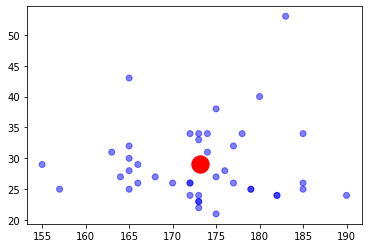

In [131]:
plt.scatter(data.iloc[:,0], data.iloc[:,1],  marker = 'o', c = data['centroid'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', s=300, 
           c = centroids.index.map(lambda x: colors[x]))

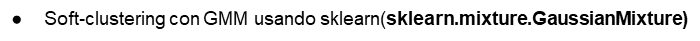!

In [132]:
gmm = GaussianMixture(n_components=2, random_state=0).fit(data)

In [133]:
labels = gmm.predict(data)

In [156]:
data.head(10)

,Estatura(metros),Edad(anios),centroid,error
0,177.0,26,1,1.039930e+10
1,174.0,31,1,1.048135e+10
2,172.0,24,1,9.737959e+09
3,178.0,34,1,1.115196e+10
4,165.0,32,1,9.661405e+09
5,166.0,29,1,9.528083e+09
6,164.0,27,1,9.190042e+09
7,185.0,34,1,1.193638e+10
8,185.0,26,1,1.126601e+10
9,175.0,21,1,9.815990e+09


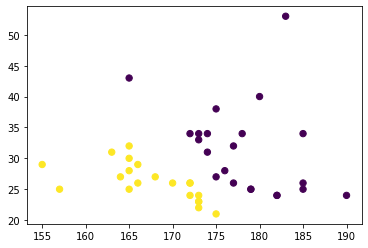

In [135]:
plt.scatter(data.loc[:,"Estatura(metros)"],data.loc[:,"Edad(anios)"], c = labels, s=40, cmap='viridis')

In [136]:
probs = gmm.predict_proba(data)
print(probs[:10].round(3))

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


## Creo que por la cantidad de los datos podríamos trabajar con 2 clcusters, para la información de la pestaña de las edades.

## El método del codo no lo veo necesario realizar para este problema ya que solo con ver la data podemos decidir la cantidad de K's que podemos utilizar.